In [164]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
FOLDER = 'Logs'
files = os.listdir(FOLDER)

#headings = list(filter(lambda x: 'headings' in x and not 'old' in x, files))
headings = list(filter(lambda x: 'headings' in x, files))
headings_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings]

#positions = list(filter(lambda x: 'position' in x and not 'old' in x, files))
positions = list(filter(lambda x: 'position' in x, files))
positions_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions]

In [166]:
headings

['RTI_Class_headings_JorgeP_26_M_2.csv',
 'RTI_Class_headings_Cesc_25_M_0.csv',
 'RTI_Class_headings_Aldo_35_M_1.csv',
 'RTI_Class_headings_Aarushi_26_F_1.csv',
 'RTI_Class_headings_Alex_24_M_0.csv',
 'RTI_Class_headings_Javier_24_M_2_old.csv',
 'RTI_Class_headings_Maja_26_F_2_old.csv',
 'RTI_Class_headings_Tapa_20_M_2_old.csv',
 'RTI_Class_headings_Sara_23_F_0.csv',
 'RTI_Class_headings_Carolina_28_F_2_old.csv',
 'RTI_Class_headings_Maud_31_F_1.csv',
 'RTI_Class_headings_NataliaM_25_F_0.csv',
 'RTI_Class_headings_SergioR_26_M_2.csv',
 'RTI_Class_headings_Alejandre_27_M_1.csv']

In [167]:
positions

['RTI_Class_positions_Cesc_25_M_0.csv',
 'RTI_Class_positions_SergioR_26_M_2.csv',
 'RTI_Class_positions_Carolina_28_F_2_old.csv',
 'RTI_Class_positions_Javier_24_M_2_old.csv',
 'RTI_Class_positions_Aldo_35_M_1.csv',
 'RTI_Class_positions_Alex_24_M_0.csv',
 'RTI_Class_positions_Maja_26_F_2_old.csv',
 'RTI_Class_positions_Tapa_20_M_2_old.csv',
 'RTI_Class_positions_JorgeP_26_M_2.csv',
 'RTI_Class_positions_Sara_23_F_0.csv',
 'RTI_Class_positions_Maud_31_F_1.csv',
 'RTI_Class_positions_NataliaM_25_F_0.csv',
 'RTI_Class_positions_Aarushi_26_F_1.csv',
 'RTI_Class_positions_Alejandre_27_M_1.csv']

0 --> 43.60917207687507
2 --> 8.576839329172547
2 --> 9.089353351335738
2 --> 21.611198077291412
1 --> 14.630140384330424
0 --> 24.456273631792392
2 --> 21.134936857227387
2 --> 36.64804988779894
2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 37.8430996501672
0 --> 147.94648624624378
1 --> 57.331455917267235
1 --> 50.4615072543077


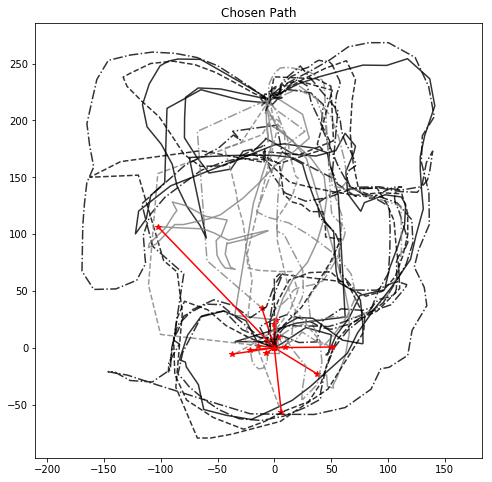

In [168]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'red',
              '1': 'red',
              '2': 'red'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='k', ls=ls_dict[exp_type], alpha=0.8, label='Finding')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='grey', ls=ls_dict[exp_type], alpha=0.8, label='Homing')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
plt.title('Chosen Path')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#plt.legend()

0 --> 43.60917207687507
2 --> 8.576839329172547
2 --> 9.089353351335738
2 --> 21.611198077291412
1 --> 14.630140384330424
0 --> 24.456273631792392
2 --> 21.134936857227387
2 --> 36.64804988779894
2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 37.8430996501672
0 --> 147.94648624624378
1 --> 57.331455917267235
1 --> 50.4615072543077


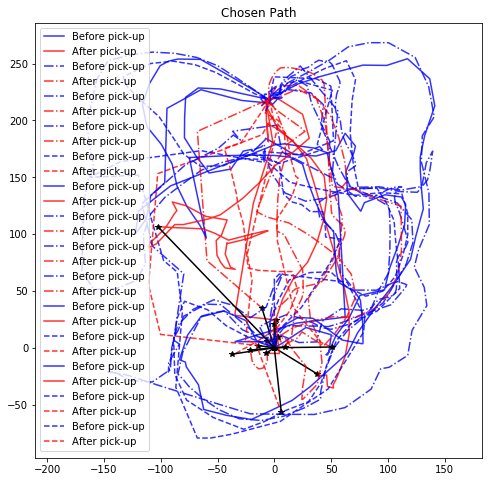

In [169]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'k',
              '1': 'k',
              '2': 'k'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='blue', ls=ls_dict[exp_type], alpha=0.8, label='Before pick-up')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='red', ls=ls_dict[exp_type], alpha=0.8, label='After pick-up')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
plt.title('Chosen Path')
plt.legend()

0 --> 43.60917207687507
2 --> 8.576839329172547
2 --> 9.089353351335738
2 --> 21.611198077291412
1 --> 14.630140384330424
0 --> 24.456273631792392
2 --> 21.134936857227387
2 --> 36.64804988779894
2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 37.8430996501672
0 --> 147.94648624624378
1 --> 57.331455917267235
1 --> 50.4615072543077


/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotl

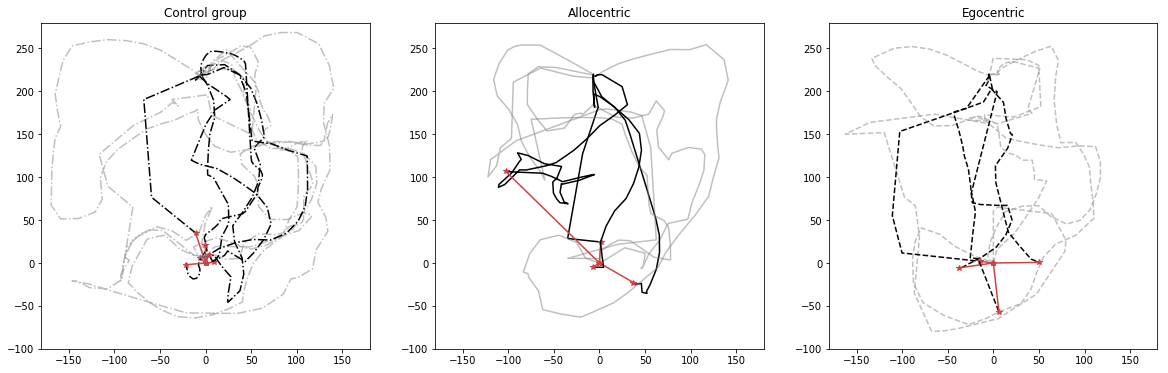

In [170]:
plt.figure(figsize=(20, 6))
plt.axis('equal')

color_dict = {'0': '#cf4144',
              '1': '#cf4144',
              '2': '#cf4144'}

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='grey', ls=ls_dict[exp_type], alpha=0.5)
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='k', ls=ls_dict[exp_type], alpha=1)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
#plt.title('Chosen Path')
#plt.legend()

0 --> 43.60917207687507
2 --> 8.576839329172547
2 --> 9.089353351335738
2 --> 21.611198077291412
1 --> 14.630140384330424
0 --> 24.456273631792392
2 --> 21.134936857227387
2 --> 36.64804988779894
2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 37.8430996501672
0 --> 147.94648624624378
1 --> 57.331455917267235
1 --> 50.4615072543077


/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


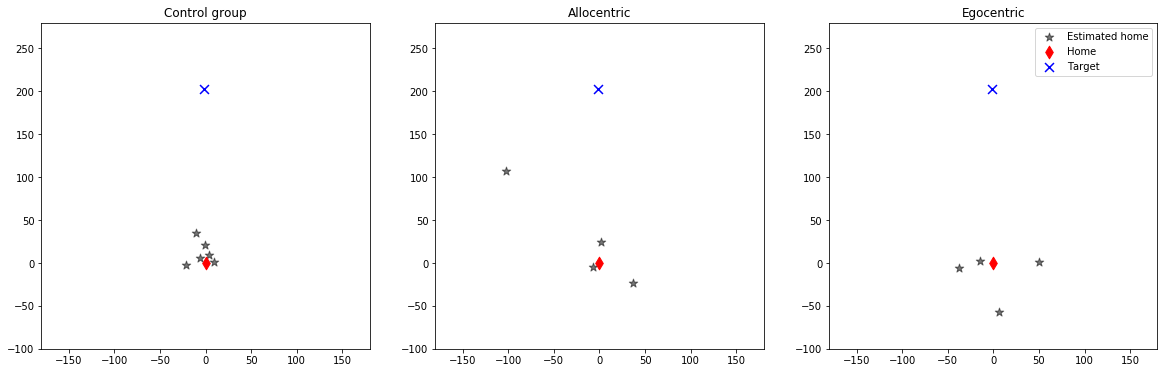

In [171]:
plt.figure(figsize=(20, 6))
plt.axis('equal')

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    plt.scatter([x1], [z1], s=80, c='#00000088', marker='*', label='Estimated home')
    
    
    print(exp_type, '-->', error)

plt.subplot(131)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
plt.subplot(132)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
plt.subplot(133)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.title('Chosen Path')
#plt.legend()

In [172]:
results = pd.DataFrame(np.array([types, errs, times, times_return]).astype(np.float32).T,
                       columns=['group', 'err', 'time', 'return_times'])

In [173]:
results.groupby('group').count()

,err,time,return_times
group,,,
0.0,4,4,4
1.0,4,4,4
2.0,6,6,6


In [174]:
results.groupby('group')['time'].mean()

group
0.0    105.245941
1.0    113.494278
2.0    101.828812
Name: time, dtype: float32

In [175]:
results.groupby('group')['return_times'].mean()

group
0.0    43.502476
1.0    43.749031
2.0    34.967644
Name: return_times, dtype: float32

In [176]:
results.groupby('group')['return_times'].std()

group
0.0    24.778944
1.0    18.883280
2.0     6.968673
Name: return_times, dtype: float32

In [177]:
results.groupby('group')['err'].mean()

group
0.0    56.164799
1.0    40.066551
2.0    17.800594
Name: err, dtype: float32

In [178]:
results.groupby('group')['err'].std()

group
0.0    62.835419
1.0    18.780191
2.0    11.015899
Name: err, dtype: float32

In [179]:
from scipy.stats import f_oneway, normaltest

In [180]:
type_ = 'return_times'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
#print(normaltest(e0))
#print(normaltest(e1))
#print(normaltest(e2))

print(f_oneway(e0, e1, e2))

F_onewayResult(statistic=0.448323986799223, pvalue=0.6498668871173536)


In [196]:
e1 = results[results['group']==1]

In [198]:
from scipy.stats import pearsonr

In [199]:
pearsonr(e1['time'], e1['err'])

(-0.7223566835017905, 0.2776433164982095)

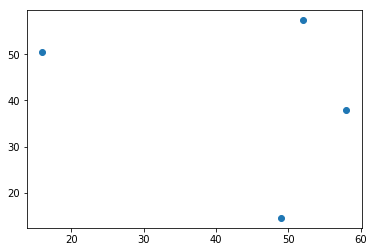

In [203]:
plt.scatter(e1['return_times'], e1['err'])

In [202]:
e1

,group,err,time,return_times
4,1.0,14.630140,167.984604,49.000599
10,1.0,37.843102,107.994698,58.003250
12,1.0,57.331455,119.998001,52.006351
13,1.0,50.461506,57.999802,15.985930


In [204]:
results

,group,err,time,return_times
0,0.0,43.609173,84.992508,32.988461
1,2.0,8.576839,55.000011,29.011570
2,2.0,9.089354,150.983795,36.996300
3,2.0,21.611198,64.986214,32.787601
4,1.0,14.630140,167.984604,49.000599
5,0.0,24.456274,135.995407,36.004799
6,2.0,21.134937,100.991898,48.003979
7,2.0,36.648048,143.002899,33.006302
8,2.0,9.743195,96.008041,30.000120
9,0.0,8.647261,78.993942,25.003611


In [181]:
e0

0     32.988461
5     36.004799
9     25.003611
11    80.013031
Name: return_times, dtype: float32

{'whiskers': [<matplotlib.lines.Line2D at 0x12ac73f28>,
 'caps': [<matplotlib.lines.Line2D at 0x12ac5ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ac73dd8>,
 'medians': [<matplotlib.lines.Line2D at 0x12ac5e048>,
 'fliers': [<matplotlib.lines.Line2D at 0x12b86e2e8>,
 'means': []}

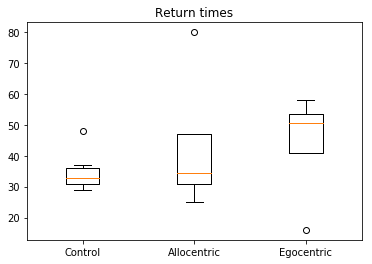

In [182]:
plt.title('Return times')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [183]:
type_ = 'err'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
#print(normaltest(e0))
#print(normaltest(e1))
#print(normaltest(e2))

print(f_oneway(e0, e1, e2))

F_onewayResult(statistic=1.493776406199134, pvalue=0.26673512055372217)


{'whiskers': [<matplotlib.lines.Line2D at 0x12ba5ac18>,
 'caps': [<matplotlib.lines.Line2D at 0x12ba41320>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ba5a7f0>,
 'medians': [<matplotlib.lines.Line2D at 0x12ba419b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12ba41cf8>,
 'means': []}

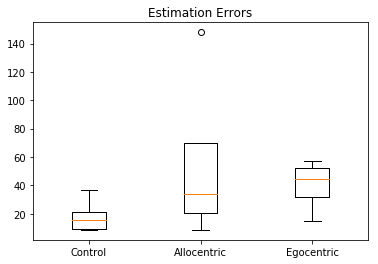

In [184]:
plt.title('Estimation Errors')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [185]:
e0

0      43.609173
5      24.456274
9       8.647261
11    147.946487
Name: err, dtype: float32

In [186]:
print(e2.mean())
print(e0.mean())
print(e1.mean())

17.800596237182617
56.164798736572266
40.066551208496094


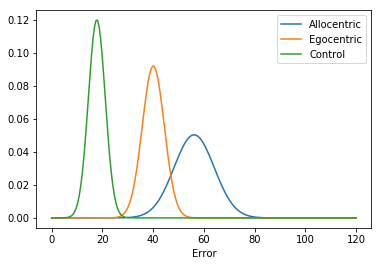

In [187]:
import math
from scipy import stats
for e, n in zip([e0, e1, e2], ['Allocentric', 'Egocentric', 'Control']):
    mu = e.mean()
    variance = e.std()
    sigma = math.sqrt(variance)
    x = np.linspace(0, 120, 200)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=n)
plt.xlabel('Error')
plt.legend()

In [188]:
e0

0      43.609173
5      24.456274
9       8.647261
11    147.946487
Name: err, dtype: float32

In [189]:
e1

4     14.630140
10    37.843102
12    57.331455
13    50.461506
Name: err, dtype: float32

In [190]:
e2

1     8.576839
2     9.089354
3    21.611198
6    21.134937
7    36.648048
8     9.743195
Name: err, dtype: float32

In [191]:
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu

In [192]:
mannwhitneyu(e0.iloc[1:], e1.iloc[1:])

MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)

In [193]:
mannwhitneyu

<function scipy.stats.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)>

In [24]:
results.groupby('group').count()

,err,time,return_times
group,,,
0.0,3,3,3
1.0,4,4,4
2.0,6,6,6


In [25]:
h = headings_csv[8]

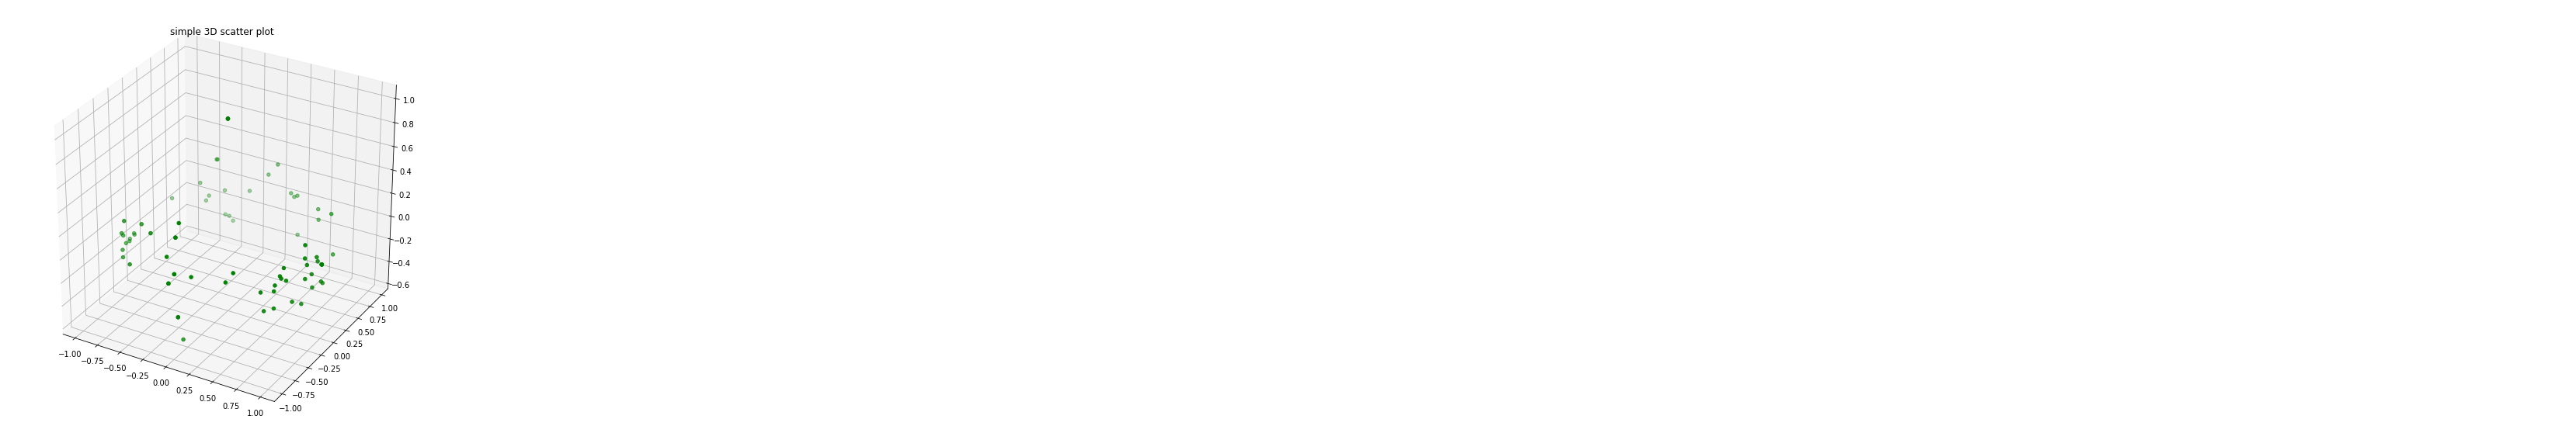

In [26]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(h.z, h.x, h.y, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

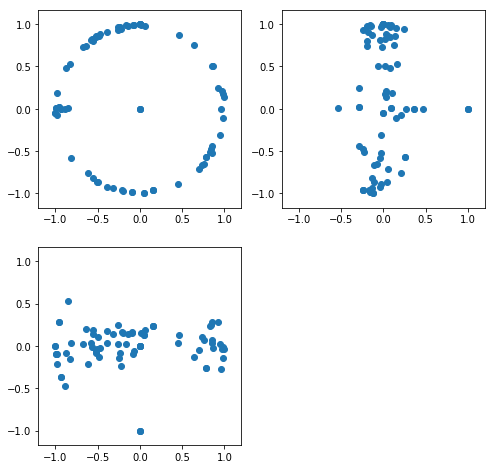

In [27]:
lim = 1.2
plt.figure(figsize=(8, 8))
plt.subplot(222)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.y, h.z)
plt.subplot(221)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, h.z)
plt.subplot(223)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, -h.y)

In [28]:
def cart_to_spherical(x, y, z):
    theta = np.arctan(np.sqrt(x**2 + y**2)/z)
    phi = np.arctan2(y, x)
    return theta, phi

In [29]:
theta, phi = cart_to_spherical(h.x, h.z, h.y)

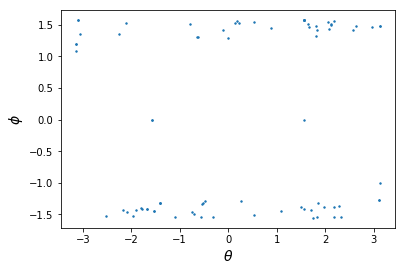

In [30]:
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.scatter(phi, theta, s=2)

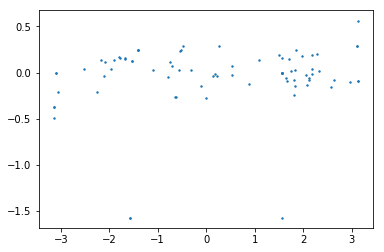

In [31]:
plt.scatter(phi, (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2, s=2)

In [32]:
theta2 = (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2
theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
phi = phi.append(pd.Series([-np.pi, np.pi]))

In [33]:
def myplot(x, y, s, bins=300):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0]-margin, xedges[-1]+margin, yedges[0]-margin, yedges[-1]+margin]
    return heatmap.T, extent

Text(0.5, 1.0, 'Heading distribution')

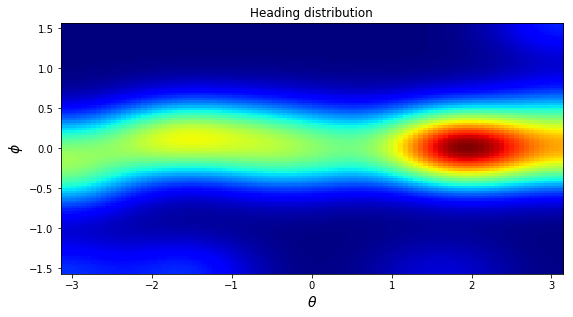

In [34]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.title('Heading distribution')

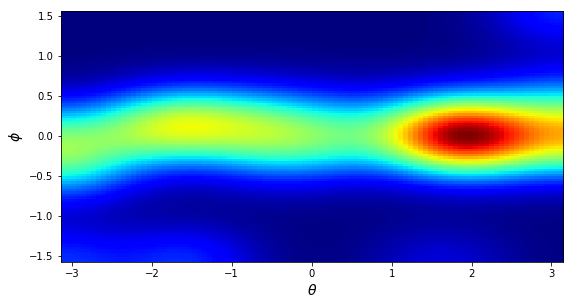

In [35]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

In [36]:
def spherical2cart(p, t):
    x = np.cos(t)*np.sin(p)
    y = np.sin(t)*np.sin(p)
    z = np.cos(p)
    return x, y, z

In [37]:
len(np.linspace(extent[0], extent[1], 500))

500

In [38]:
stats.entropy(img.ravel())

8.586330032848066

In [39]:
def calculate_entropy(x, y, z, bins=300, s=40):
    t, p = cart_to_spherical(x, y, z)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return stats.entropy(heatmap.ravel())

2 ---> 11.053743486861343


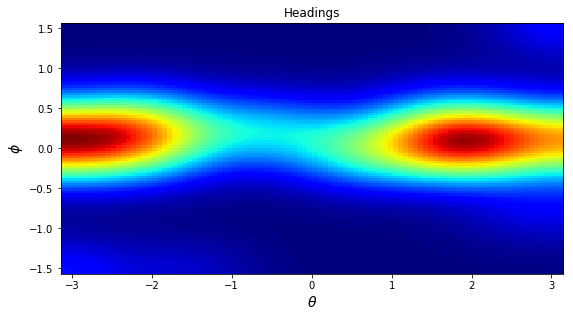

0 ---> 11.093781055381527


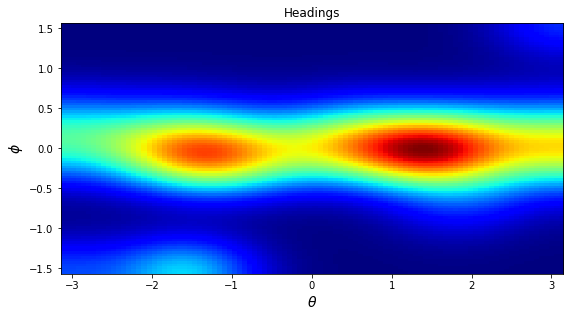

1 ---> 10.87640613574953


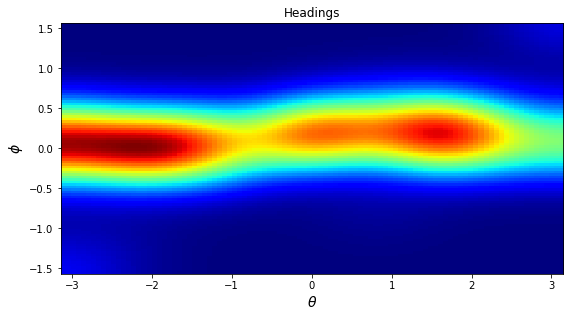

1 ---> 11.008436015430949


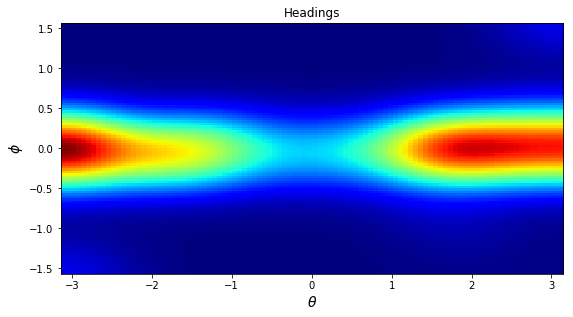

0 ---> 10.872046515141628


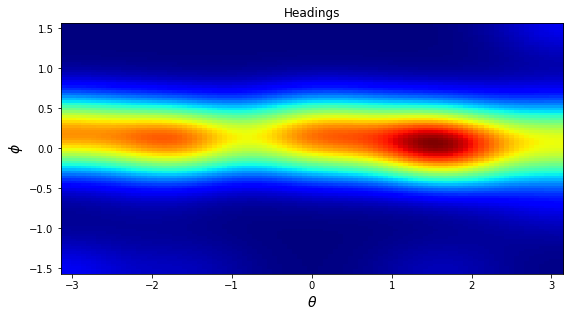

2 ---> 10.696872066579106


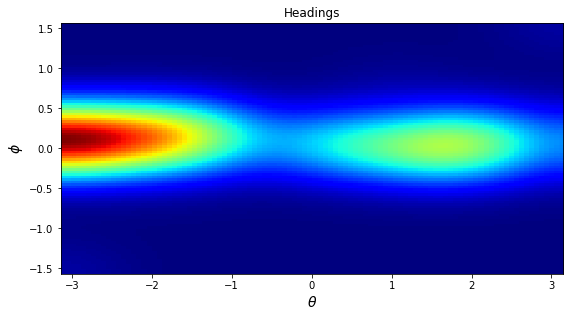

2 ---> 11.031929571322811


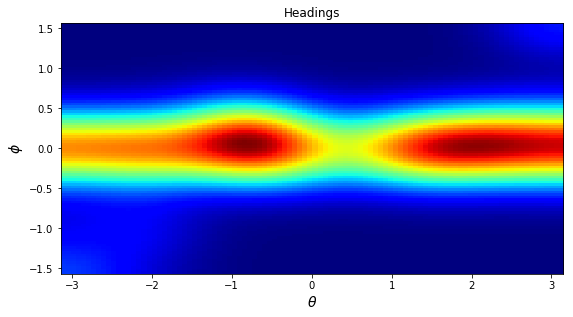

2 ---> 10.76301185151751


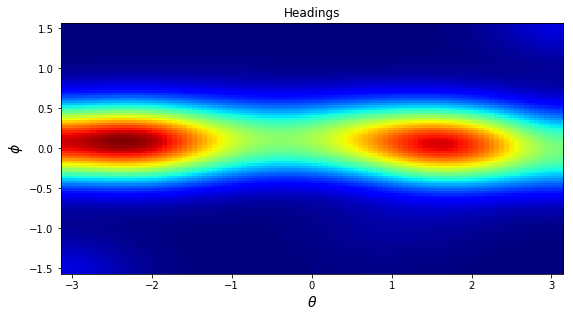

0 ---> 10.837958054080993


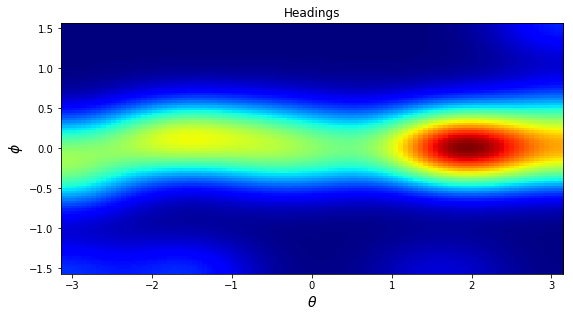

2 ---> 10.996098927793666


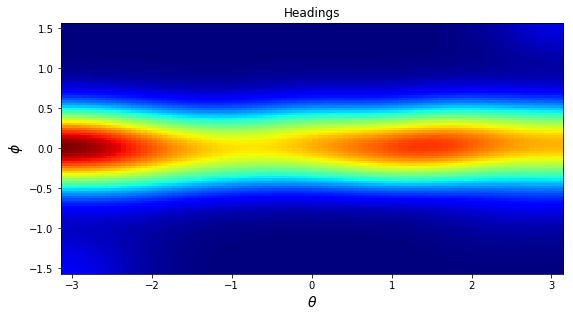

1 ---> 11.06832624318387


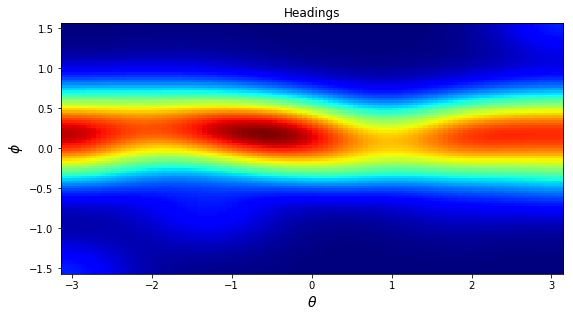

2 ---> 11.0980519009393


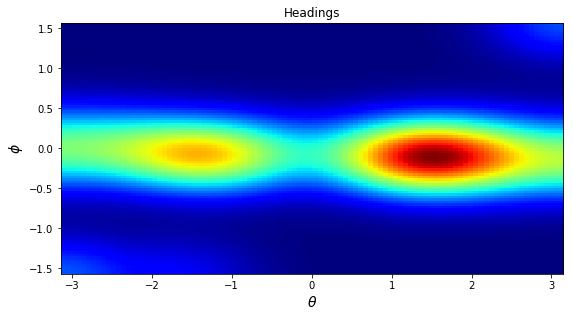

1 ---> 10.836721536738233


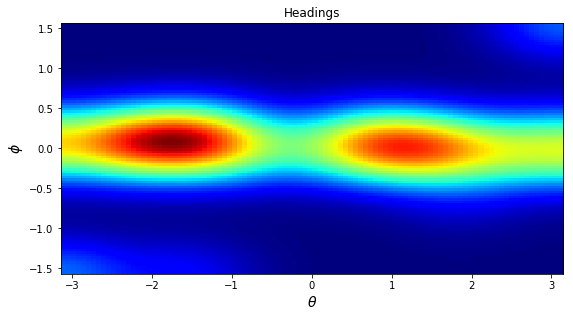

In [156]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(H)

In [159]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [160]:
entropies.groupby('group')['H'].mean()

group
0.0    10.934595
1.0    10.947472
2.0    10.939951
Name: H, dtype: float64

In [161]:
entropies.groupby('group')['H'].std()

group
0.0    0.138909
1.0    0.108993
2.0    0.167303
Name: H, dtype: float64

In [63]:
g1 = entropies[entropies['group']==0]['H'].values
g2 = entropies[entropies['group']==1]['H'].values
g3 = entropies[entropies['group']==2]['H'].values

In [64]:
from scipy.stats import f_oneway

In [162]:
f_oneway(g1, g2, g3)

F_onewayResult(statistic=0.0069385836102800824, pvalue=0.9930902094799652)

In [46]:
entropies.groupby('group')['H'].count()

group
0.0    3
1.0    4
2.0    6
Name: H, dtype: int64

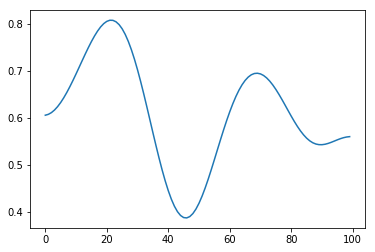

In [147]:
plt.plot(img.sum(axis=0))

2 ---> 11.053743486861343


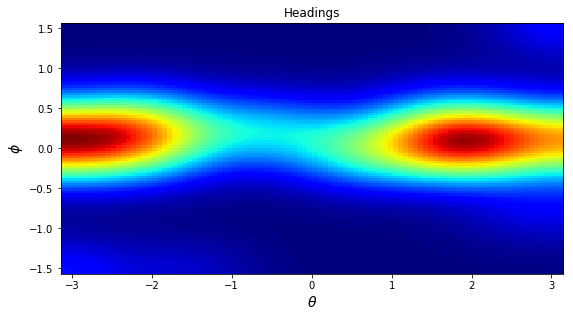

0 ---> 11.093781055381527


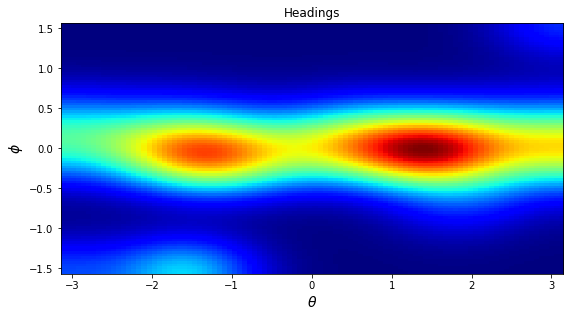

1 ---> 10.87640613574953


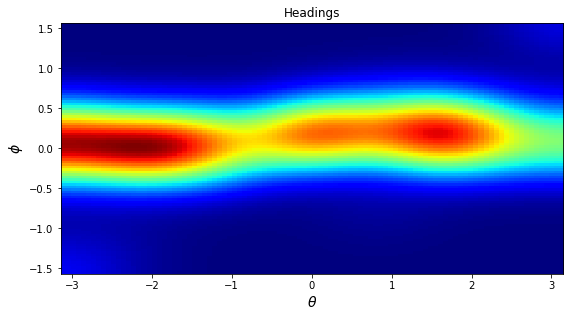

1 ---> 11.008436015430949


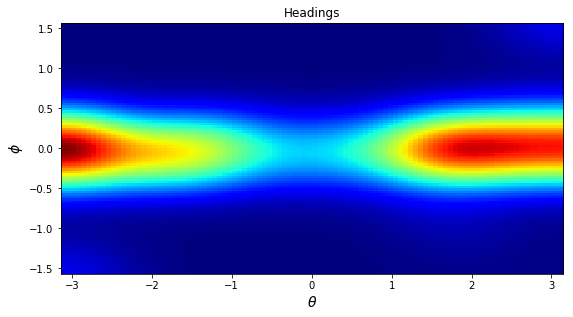

0 ---> 10.872046515141628


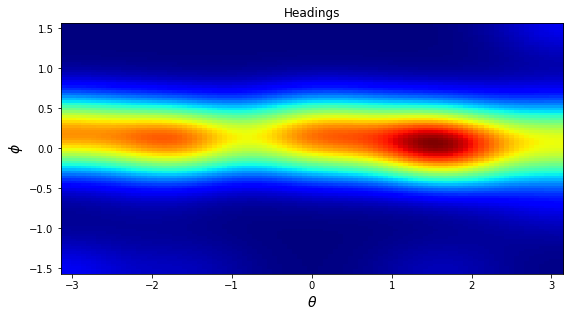

2 ---> 10.696872066579106


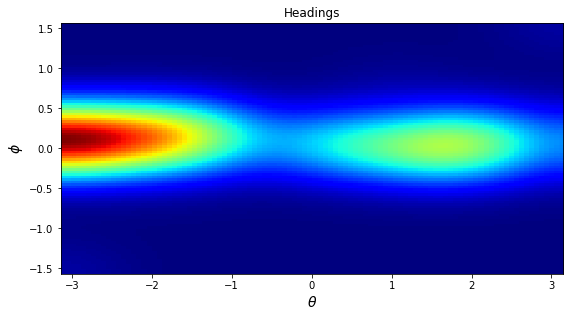

2 ---> 11.031929571322811


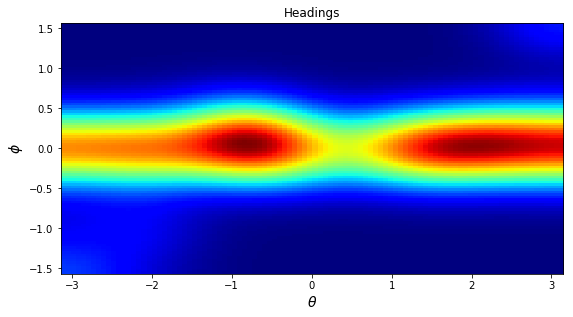

2 ---> 10.76301185151751


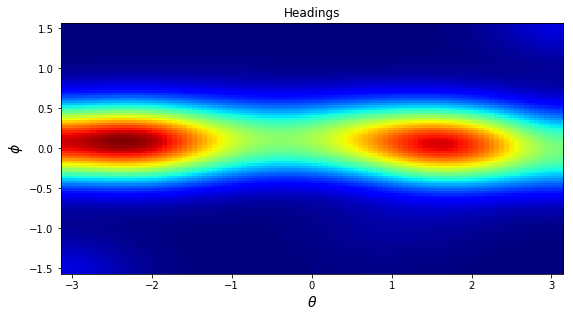

0 ---> 10.837958054080993


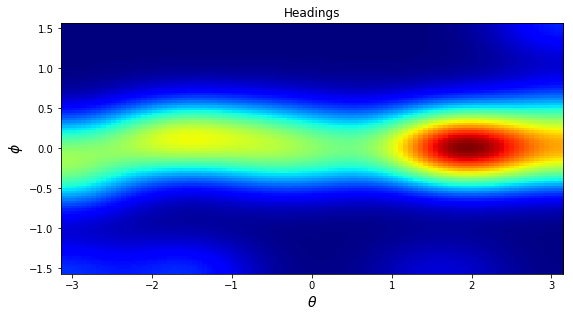

2 ---> 10.996098927793666


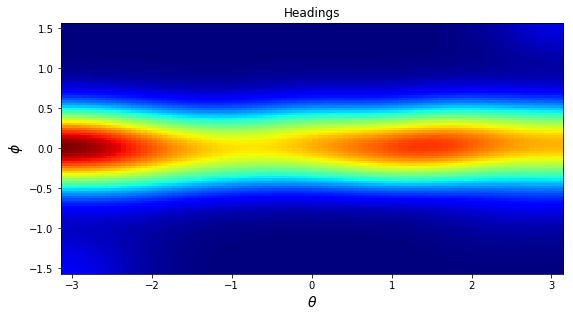

1 ---> 11.06832624318387


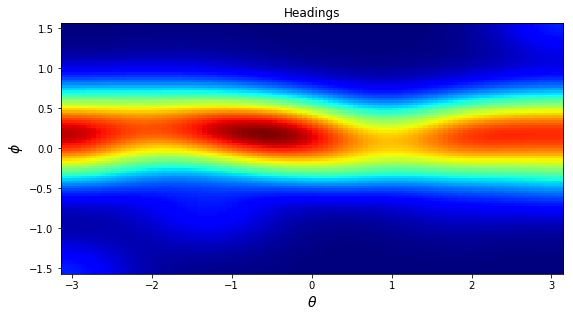

2 ---> 11.0980519009393


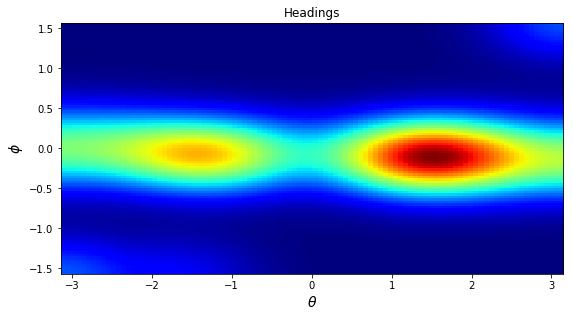

1 ---> 10.836721536738233


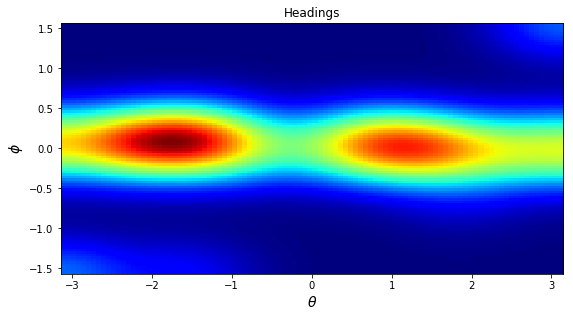

In [148]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(stats.entropy(img.sum(axis=0)))

In [149]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [150]:
entropies.groupby('group')['H'].mean()

group
0.0    4.590136
1.0    4.579716
2.0    4.571320
Name: H, dtype: float64

In [151]:
entropies.groupby('group')['H'].std()

group
0.0    0.007859
1.0    0.024881
2.0    0.026726
Name: H, dtype: float64